In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,259,267,276,284,291,315,328,346,346,346


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 171 entries, Province/State to 7/6/20
dtypes: float64(2), int64(167), object(2)
memory usage: 355.5+ KB


In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 171 entries, Province/State to 7/6/20
dtypes: float64(2), int64(167), object(2)
memory usage: 355.5+ KB


In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,259,267,276,284,291,315,328,346,346,346


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


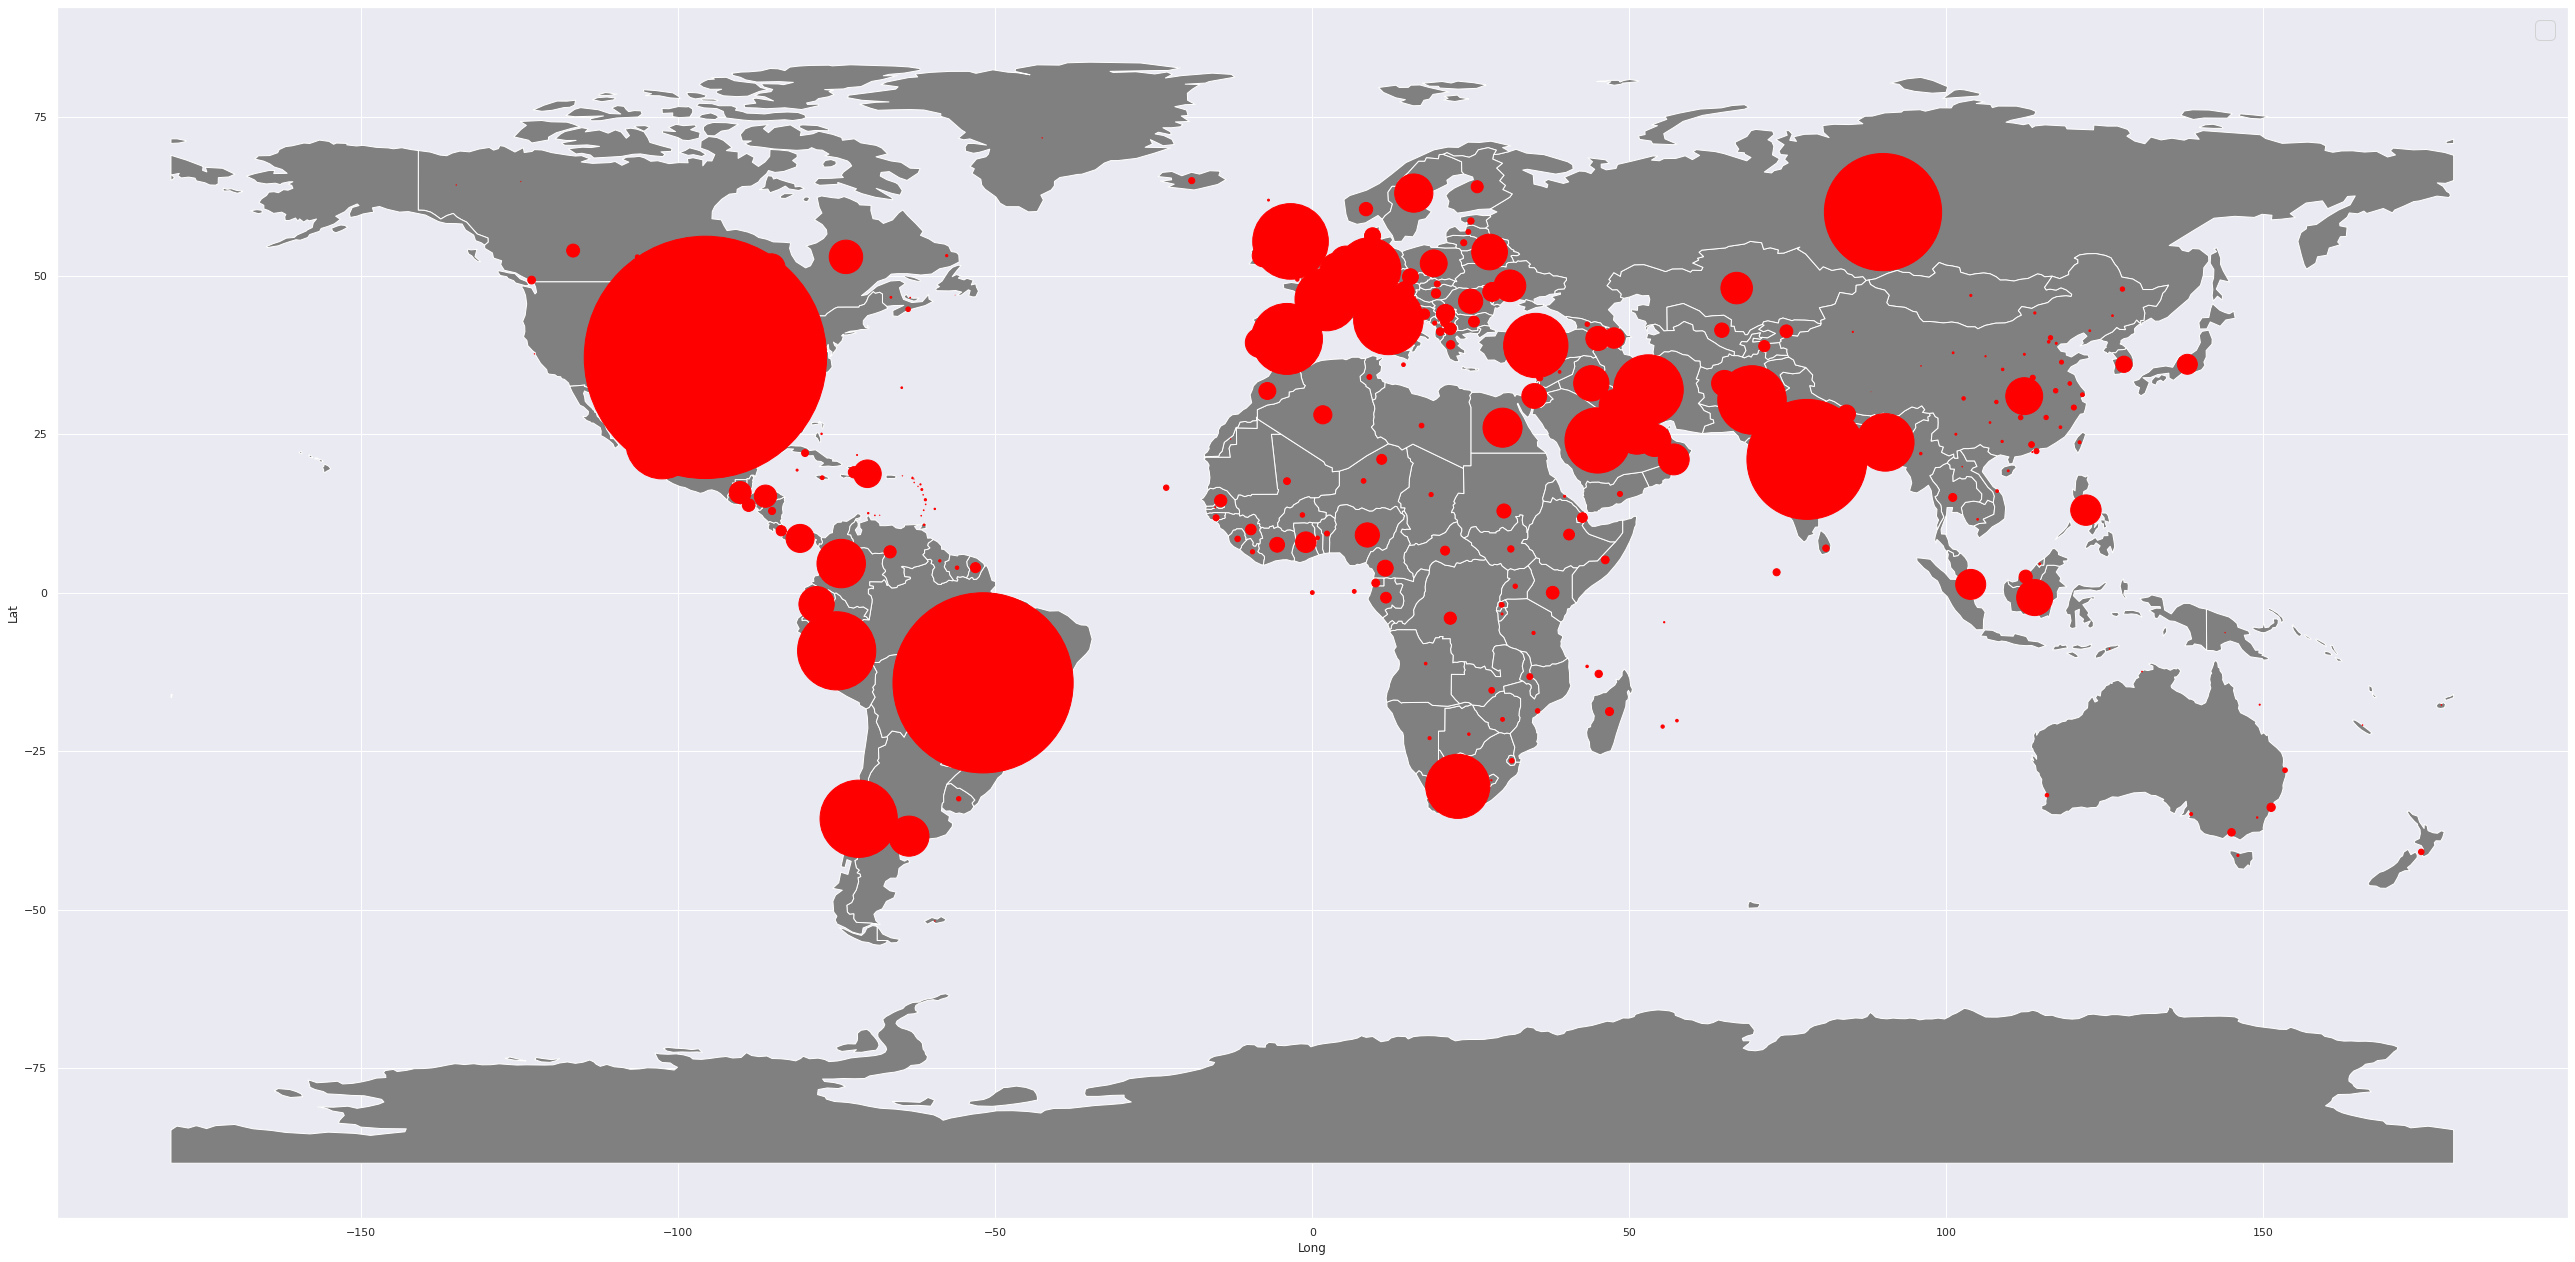

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/50, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/2/20,1589,781970,191083,150376,179800,79665,957692,11759,76927,828
7/3/20,1657,790404,191467,150376,180300,79680,984615,11811,77185,837
7/4/20,1721,894325,191944,150376,181000,79706,990731,11832,77185,840
7/5/20,1745,906763,192108,150376,181719,79718,1029045,11848,77185,849


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/2/20,4023,35237,20072,2519,7000,21120,34197,715,130,2353
7/3/20,4311,35995,21293,2519,7267,22116,35148,721,130,2361
7/4/20,4621,36983,22501,2519,7507,22921,36184,728,130,2369
7/5/20,4996,38149,23248,2519,7777,23943,37425,732,133,2372


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/2/20,18,667,843,83,191,591,765,10,8,86
7/3/20,18,698,880,83,202,605,775,10,8,86
7/4/20,18,720,920,83,210,629,786,10,8,86
7/5/20,19,747,947,83,217,639,794,10,8,86


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/2/20,4023,35237,20072,2519,7000,21120,34197,715,130,2353
7/3/20,4311,35995,21293,2519,7267,22116,35148,721,130,2361
7/4/20,4621,36983,22501,2519,7507,22921,36184,728,130,2369
7/5/20,4996,38149,23248,2519,7777,23943,37425,732,133,2372


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/2/20,18,667,843,83,191,591,765,10,8,86
7/3/20,18,698,880,83,202,605,775,10,8,86
7/4/20,18,720,920,83,210,629,786,10,8,86
7/5/20,19,747,947,83,217,639,794,10,8,86


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/1/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/2/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/3/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/4/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
7/2/20,1.071942,1.022459,1.055810,1.0,1.039192,1.042345,1.024261,1.011315,1.000000,1.002129
7/3/20,1.071588,1.021511,1.060831,1.0,1.038143,1.047159,1.027809,1.008392,1.000000,1.003400
7/4/20,1.071909,1.027448,1.056732,1.0,1.033026,1.036399,1.029475,1.009709,1.000000,1.003388
7/5/20,1.081151,1.031528,1.033199,1.0,1.035966,1.044588,1.034297,1.005495,1.023077,1.001266


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,69,69,69,69,69,68,68,68,70,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,POINT (-77.39630 25.03430)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,97,97,97,97,97,97,97,98,98,POINT (-59.54320 13.19390)
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,1061,1061,1062,1063,1064,1064,1064,1064,1065,POINT (-63.74430 44.68200)
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,91995,91995,95269,98090,102261,106392,109793,113685,117412,POINT (-74.29730 4.57090)
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,3130,3269,3459,3753,4023,4311,4621,4996,5241,POINT (-83.75340 9.74890)
89,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,2332,2340,2341,2348,2353,2361,2369,2372,2380,POINT (-80.00000 22.00000)
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,31373,31816,32568,33387,34197,35148,36184,37425,38128,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,5934,6173,6438,6736,7000,7267,7507,7777,8027,POINT (-88.89650 13.79420)
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,3461,3774,4004,4268,4444,4558,4913,4913,5054,POINT (-53.12580 3.93390)


In [36]:
temp.drop([41,82,109,113,115,125, 158,190, 204, 217, 222, 225, 227, 232,233,237, 243, 248,249,250,255], axis=0, inplace=True)

In [37]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,geometry
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,69,69,69,69,69,68,68,68,70,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,POINT (-77.39630 25.03430)
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,97,97,97,97,97,97,97,98,98,POINT (-59.54320 13.19390)
85,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,3130,3269,3459,3753,4023,4311,4621,4996,5241,POINT (-83.75340 9.74890)
89,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,2332,2340,2341,2348,2353,2361,2369,2372,2380,POINT (-80.00000 22.00000)
96,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,31373,31816,32568,33387,34197,35148,36184,37425,38128,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,5934,6173,6438,6736,7000,7267,7507,7777,8027,POINT (-88.89650 13.79420)
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,3461,3774,4004,4268,4444,4558,4913,4913,5054,POINT (-53.12580 3.93390)
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,POINT (-63.05010 18.07080)
123,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,16930,17409,18096,19011,20072,21293,22501,23248,23972,POINT (-90.23080 15.78350)


In [38]:
len(temp)

21

In [39]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [40]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'7/5/20'

In [41]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [43]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [44]:
cases_camcar_all

,Province/State,Country/Region,7/5/20,7/6/20
0,NaN,Panama,38149,39334
1,NaN,Dominican Republic,37425,38128
2,NaN,Honduras,23943,24665
3,NaN,Guatemala,23248,23972
4,NaN,El Salvador,7777,8027
5,NaN,Haiti,6333,6371
6,NaN,Costa Rica,4996,5241
7,French Guiana,France,4913,5054
8,NaN,Nicaragua,2519,2519
9,NaN,Cuba,2372,2380


In [45]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [46]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [47]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [48]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,63,63,63,63,63,63,63,63,63,63
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,2946,3256,3256,3376,3488,3650,3851,4001,4178,4305
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,14,15,15,16,17,18,18,18,19,23
89,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,86,86,86,86,86,86,86,86,86,86
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,718,726,733,747,754,765,775,786,794,804
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,143,152,164,174,182,191,202,210,217,223
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,12,12,15,15,16,16,16,16,16,20


In [49]:
temp_deaths.drop([41,82,109,113,115,125,158,190, 204, 217, 222, 225, 227, 232,233,237, 243, 248,249,250,255], axis=0, inplace=True)

In [50]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
85,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,14,15,15,16,17,18,18,18,19,23
89,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,86,86,86,86,86,86,86,86,86,86
96,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,718,726,733,747,754,765,775,786,794,804
99,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,143,152,164,174,182,191,202,210,217,223
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,12,12,15,15,16,16,16,16,16,20
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
123,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,706,727,746,773,817,843,880,920,947,981


In [51]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [52]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'7/5/20'

In [53]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [55]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [56]:
deaths_camcar_all

,Province/State,Country/Region,7/5/20,7/6/20
0,NaN,Guatemala,947,981
1,NaN,Dominican Republic,794,804
2,NaN,Panama,747,770
3,NaN,Honduras,639,656
4,NaN,El Salvador,217,223
5,NaN,Haiti,113,113
6,NaN,Cuba,86,86
7,NaN,Nicaragua,83,83
8,NaN,Costa Rica,19,23
9,French Guiana,France,16,20


In [57]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [58]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,22,22,22,22,22,23,23,23,23,23
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,87,87,87,87,89,89,89,89,89,89
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,90,90,90,90,90,90,90,90,90,90
24,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,...,18,18,18,18,18,18,19,19,19,19
73,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,34999,38345,38345,40021,42143,43481,44606,45409,46643,47961
76,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,1325,1366,1394,1436,1516,1589,1657,1721,1745,1776
80,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,2187,2201,2211,2214,2218,2221,2224,2227,2229,2234
87,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
88,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,16666,17142,17280,17580,17904,18141,18392,18602,18943,19489
91,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,3447,3557,3648,3770,3964,4115,4268,4434,4573,4730


In [59]:
temp_recovered.drop([24,73,87,101,102,106,114,119,154,186,188,202,217, 222, 225, 227,235,236,237, 242], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [60]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,22,22,22,22,22,23,23,23,23,23
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,87,87,87,87,89,89,89,89,89,89
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,90,90,90,90,90,90,90,90,90,90
76,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,1325,1366,1394,1436,1516,1589,1657,1721,1745,1776
80,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,2187,2201,2211,2214,2218,2221,2224,2227,2229,2234
88,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,16666,17142,17280,17580,17904,18141,18392,18602,18943,19489
91,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,3447,3557,3648,3770,3964,4115,4268,4434,4573,4730
99,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,1249,1249,1352,1508,1602,1680,1777,1866,1866,1984
107,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,36,37,37,37,37,37,37,37,37,37
116,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,3123,3152,3170,3194,3231,3279,3315,3330,3382,3429


In [61]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'7/5/20'

In [62]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,7/5/20,7/6/20
0,NaN,Dominican Republic,18943,19489
1,NaN,Panama,17986,18036
2,NaN,El Salvador,4573,4730
3,NaN,Guatemala,3382,3429
4,NaN,Honduras,2490,2585
5,NaN,Cuba,2229,2234
6,French Guiana,France,1866,1984
7,NaN,Haiti,1549,1824
8,NaN,Costa Rica,1745,1776
9,NaN,Nicaragua,1238,1238


In [63]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [64]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [65]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [66]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,65,69,69,69,69,69,68,68,68,70
1,Bahamas,0,0,0,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
2,Barbados,0,0,0,0,0,0,0,0,0,...,97,97,97,97,97,97,97,97,98,98
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,2979,3130,3269,3459,3753,4023,4311,4621,4996,5241
4,Cuba,0,0,0,0,0,0,0,0,0,...,2330,2332,2340,2341,2348,2353,2361,2369,2372,2380
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,30619,31373,31816,32568,33387,34197,35148,36184,37425,38128
6,El Salvador,0,0,0,0,0,0,0,0,0,...,5727,5934,6173,6438,6736,7000,7267,7507,7777,8027
7,French Guiana,0,0,0,0,0,0,0,0,0,...,3461,3461,3774,4004,4268,4444,4558,4913,4913,5054
8,St Martin,0,0,0,0,0,0,0,0,0,...,42,43,43,43,43,43,43,43,43,43
9,Guatemala,0,0,0,0,0,0,0,0,0,...,16397,16930,17409,18096,19011,20072,21293,22501,23248,23972


In [67]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
1,Bahamas,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
2,Barbados,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,14,15,15,16,17,18,18,18,19,23
4,Cuba,0,0,0,0,0,0,0,0,0,...,86,86,86,86,86,86,86,86,86,86
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,718,726,733,747,754,765,775,786,794,804
6,El Salvador,0,0,0,0,0,0,0,0,0,...,143,152,164,174,182,191,202,210,217,223
7,French Guiana,0,0,0,0,0,0,0,0,0,...,12,12,15,15,16,16,16,16,16,20
8,St Martin,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,Guatemala,0,0,0,0,0,0,0,0,0,...,706,727,746,773,817,843,880,920,947,981


In [68]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,23,23,23,23,23
1,Bahamas,0,0,0,0,0,0,0,0,0,...,87,87,87,87,89,89,89,89,89,89
2,Barbados,0,0,0,0,0,0,0,0,0,...,90,90,90,90,90,90,90,90,90,90
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,1325,1366,1394,1436,1516,1589,1657,1721,1745,1776
4,Cuba,0,0,0,0,0,0,0,0,0,...,2187,2201,2211,2214,2218,2221,2224,2227,2229,2234
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,16666,17142,17280,17580,17904,18141,18392,18602,18943,19489
6,El Salvador,0,0,0,0,0,0,0,0,0,...,3447,3557,3648,3770,3964,4115,4268,4434,4573,4730
7,French Guiana,0,0,0,0,0,0,0,0,0,...,1249,1249,1352,1508,1602,1680,1777,1866,1866,1984
8,St Martin,0,0,0,0,0,0,0,0,0,...,36,37,37,37,37,37,37,37,37,37
9,Guatemala,0,0,0,0,0,0,0,0,0,...,3123,3152,3170,3194,3231,3279,3315,3330,3382,3429


In [69]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [70]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_recovered_no_geo.T.loc['2/29/20':]

In [71]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [72]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [73]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [74]:
cases_camcar_all.shape

(129, 21)

In [75]:
recovered_camcar_all.shape

(129, 21)

In [76]:
deaths_camcar_all.shape

(129, 21)

In [77]:
active_camcar_all.shape

(129, 21)